<a href="https://colab.research.google.com/github/tahsinhossain123/CSCI135-Class/blob/main/Gradient_Boosted_Descent_and_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import subprocess
import sys

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['Entity_Type_Detector_Data_Set.csv']))

Saving Entity_Type_Detector_Data_Set.csv to Entity_Type_Detector_Data_Set.csv


In [ ]:
df.sample(10)

,Entity Name,Entity Type
7848,"Boreh, Abdourahman Mohamed Mahamoud",Person
7604,撖学平,Person
5743,Megan Botha,Person
7605,"Sharif, Abdulftah",Person
5573,卢丽娟,Person
3033,ASL Securities Company Limited,Company
1695,Man Yick,Company
6825,Yerkebulan Onalbekuly Sapiyev,Person
7798,"Kharif, Fatma Abdullah Tyrab",Person
9304,"Shousha, Mohamed Abdel Fadil",Person


## pycld failed expirement as most entities where lables unknown

In [ ]:
pip install -U pycld2
import pycld2 as pycld
print(pycld.ENCODINGS)
print(pycld.LANGUAGES)
df['langs_pycld'] = df['Entity Name'].apply(lambda x: [r[0] for r in pycld.detect(x)[2]])
df['langs_pycld'] = df['langs_pycld'].str[0]

SyntaxError: ignored

In [ ]:
df.sample(10)

,Entity Name,Entity Type,langs_ad
7735,"Zaeva, Aleksandra",Person,LATIN
2755,CELTIC s.r.o.,Company,LATIN
9433,Николай Григорьевич Шульгинов,Person,CYRILLIC
6990,"Carvajal Alvarez, Carlos José",Person,LATIN
3659,KMG-SECURITY ЖШС,Company,CYRILLIC
5607,"Picco, Thierry",Person,LATIN
4480,بنسي ليبرمان,Person,ARABIC
9024,"Ibatullin, Ravil Rashitovich",Person,LATIN
1661,SIA REAP,Company,LATIN
2497,Puerto Rico Tourism,Company,LATIN


In [ ]:
df['langs_pycld'].unique()

KeyError: ignored

In [ ]:
df['langs_pycld'].value_counts()

KeyError: ignored

## Alphabet Detector new column

In [ ]:
def ad_col():
  subprocess.check_call([sys.executable, "-m", "pip", "install", "alphabet-detector"])
  from alphabet_detector import AlphabetDetector
  ad = AlphabetDetector()
  df['langs_ad'] = df['Entity Name'].apply(lambda x: [ad.detect_alphabet(x)])
  df['langs_ad'] = df['langs_ad'].str[0]
  df['langs_ad'] = [list(e) for e in df.langs_ad]
  df['langs_ad'] = df['langs_ad'].str[0]
  

In [ ]:
ad_col()

In [ ]:
df.sample(10)

,Entity Name,Entity Type,langs_ad
6782,"MƏMMƏDOV,Zaur",Person,LATIN
3690,ОШ МАМЛЕКЕТТИК УНИВЕРСИТЕТИ МЕКЕМЕСИ,Company,CYRILLIC
2494,Aeropuerto de Santa Isabel,Company,LATIN
132,KCRAM,Company,LATIN
5338,马瑞云,Person,CJK
6626,青柳真,Person,CJK
1956,Outer Islands Development Corporation (OIDC),Company,LATIN
2131,National Life Insurance Company,Company,LATIN
6736,いむらひでや,Person,HIRAGANA
8803,Shihab Reza,Person,LATIN


In [ ]:
df['langs_ad'].unique()

array(['LATIN', 'CJK', 'ARABIC', 'CYRILLIC', 'GREEK', 'HEBREW',
       'DEVANAGARI', 'ARMENIAN', 'HIRAGANA', 'KATAKANA', 'GEORGIAN',
       'HANGUL', 'LAO', 'MYANMAR', 'SINHALA', 'THAI', 'KATAKANA-HIRAGANA'],
      dtype=object)

In [ ]:
df['langs_ad'].value_counts()

LATIN                7867
CJK                   924
CYRILLIC              308
HANGUL                277
ARABIC                256
DEVANAGARI             52
SINHALA                36
HEBREW                 36
MYANMAR                34
ARMENIAN               33
THAI                   33
GEORGIAN               33
GREEK                  31
LAO                    31
HIRAGANA               28
KATAKANA               13
KATAKANA-HIRAGANA       7
Name: langs_ad, dtype: int64

In [ ]:
#less specific but nothing left unkown

## hybrid failed experiment ( do not want to work with this tool for less technical reasons)

In [ ]:
def first_elem_of_list(x):
  if isinstance(x,list):
    x = x[0]
  return x

def google_hybrid():
  subprocess.check_call([sys.executable, "-m", "pip", "install", "googletrans==3.1.0a0"])
  from googletrans import Translator
  tran = Translator(service_urls=['translate.googleapis.com'])
  temp1 = []
  for x in df['Entity Name']:
    temp1.append(x)
  temp = []
  for x in range(df.shape[0]):
    if df['langs_ad'].iloc[x] == 'LATIN' or df['langs_ad'].iloc[x] =='CJK' or df['langs_ad'].iloc[x] =='CYRILLIC':
      x1 = tran.detect(temp1[x])
      temp.append(x1.lang)
    else:
      temp.append(df['langs_ad'].iloc[x])
  df['hybrid'] = temp
  df['hybrid'] = df['hybrid'].apply(lambda x: first_elem_of_list(x))

  google_hybrid()

In [ ]:
df.sample(10)

NameError: ignored

## tiny segmenter to detrmine length of cjk langs

In [ ]:
def jap_count(entity):
  subprocess.check_call([sys.executable, "-m", "pip", "install", "tinysegmenter"])
  import tinysegmenter
  segmenter = tinysegmenter.TinySegmenter()
  l = segmenter.tokenize(entity)
  h_list = []
  word_count = len(l)
  for x in l:
    if len(x) == 1:
      e_hex = ord(x)
      h_list.append(hex(e_hex))
  symbols = ['0x3063','0x30c4','0x30fc','0x309b','0x3099','0x309c','0x309a','0x3005','0x4edd','0x30fd','0x30fe','0x309d','0x309e','0x3003','0x3031','0x3032','0x3033',
             '0x3035' ,'0x3034','0x3002','0x3001','0x30fb','0x30a0','0xff1d','0x3006','0x301c','0x2026','0x2025','0x30f6','0x2022','0x25e6','0xfe45','0xfe46','0x203b',
             '0xff0A','0x303d','0x3013','0x266a','0x266b','0x266c','0x2669','0x3007','0x300c','0x300d','0x300e','0x300f','0xff08','0xff09','0x3014','0x3015','0xff3b',
             '0xff3d','0xff5b','0xff5d','0xff5e','0xff60','0x3008','0x3009','0x300a','0x300b','0x3010','0x3011','0x3016','0x3017','0x3018','0x3019','0x301a','0x301b']	
  for y in h_list:
    if y in symbols:
      word_count = word_count -1
  return word_count

In [ ]:
j_sub['count'] = j_sub['Entity Name'].apply(lambda x: jap_count(x))
for x in j_sub['Entity Name']:
  print(segmenter.tokenize(x))

NameError: ignored

In [ ]:
j_sub

NameError: ignored

In [ ]:
# TA Comments 

# The link below shows an approach to multilingual data. It may be a bit challenging to implement something similar to this given your data set but i would take this approach into consideration. 
# https://www.kaggle.com/code/rstogi896/text-classification-on-multilingual-data/notebook

# Understanding how xgboost works
# https://docs.aws.amazon.com/sagemaker/latest/dg/xgboost-HowItWorks.html

In [ ]:
df['langs_ad'].unique()

array(['LATIN', 'MASCULINE', 'CJK', 'ARABIC', 'CYRILLIC', 'GREEK',
       'HEBREW', 'DEVANAGARI', 'ARMENIAN', 'HIRAGANA',
       'KATAKANA-HIRAGANA', 'KATAKANA', 'GEORGIAN', 'HANGUL', 'LAO',
       'MYANMAR', 'SINHALA', 'THAI', 'IDEOGRAPHIC'], dtype=object)

In [ ]:
def space_split(entity):
  import re
  if entity[-1] == '.':
    entity = entity[:-1]
  e_list = re.split(",|\.|\-|\s",entity)
  if '' in e_list:
    e_list.remove('')
  if '-' in e_list:
    e_list.remove('-')
  return len(e_list)

In [ ]:
g_sub= df.loc[df['langs_ad'] == 'GREEK']
g_sub

,Entity Name,Entity Type,langs_ad
3467,EUROHELLENIC ΑΕ ΕΠΕΝΔΥΣΕΩΝ,Company,GREEK
3468,ΑΣΜΙΣ ΠΡΟΝΟΙΑ ΑΝΩΝΥΜΗ ΕΤΑΙΡΕΙΑ ΑΣΦΑΛΙΣΕΩΝ ΖΗΜΙΩΝ,Company,GREEK
3469,ΙΔΡΥΜΑΤΟΣ ΚΡΑΤΙΚΩΝ ΥΠΟΤΡΟΦΙΩΝ,Company,GREEK
3470,Α ΣΑΡΡΗΣ ΑΕΠΕΥ,Company,GREEK
3471,FOLLI FOLLIE ΑΕ,Company,GREEK
3472,ΜΕΓΑΣ ΑΝΩΝΥΜH ΕΤΑΙΡΕΙA ΕΠΕΝΔΥΤΙΚΗΣ ΔΙΑΜΕΣΟΛΑΒΗΣΗΣ,Company,GREEK
3473,INFO QUEST ΑΝΩΝΥΜΗ ΕΜΠΟΡΙΚΗ ΚΑΙ ΒΙΟΜΗΧΑΝΙΚΗ ΕΤ...,Company,GREEK
3474,ΤΡΑΠΕΖΑ EFG EUROBANK ERGASIAS ΑΝΩΝΥΜΗ ΕΤΑΙΡΕΙΑ,Company,GREEK
3475,ΑΘΗΝΑΙΚΗ ΧΡΗΜΑΤΙΣΤΗΡΙΑΚΗ ΑΕΠΕΥ,Company,GREEK
3476,ΠΗΓΑΣΟΣ ΑΧΕΠΕΥ,Company,GREEK


In [ ]:
g_sub['wl'] = g_sub['Entity Name'].apply(lambda x: space_split(x))

<ipython-input-38-71657b4e4bdd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_sub['wl'] = g_sub['Entity Name'].apply(lambda x: space_split(x))


In [ ]:
g_sub

,Entity Name,Entity Type,langs_ad,wl
3467,EUROHELLENIC ΑΕ ΕΠΕΝΔΥΣΕΩΝ,Company,GREEK,3
3468,ΑΣΜΙΣ ΠΡΟΝΟΙΑ ΑΝΩΝΥΜΗ ΕΤΑΙΡΕΙΑ ΑΣΦΑΛΙΣΕΩΝ ΖΗΜΙΩΝ,Company,GREEK,6
3469,ΙΔΡΥΜΑΤΟΣ ΚΡΑΤΙΚΩΝ ΥΠΟΤΡΟΦΙΩΝ,Company,GREEK,3
3470,Α ΣΑΡΡΗΣ ΑΕΠΕΥ,Company,GREEK,3
3471,FOLLI FOLLIE ΑΕ,Company,GREEK,3
3472,ΜΕΓΑΣ ΑΝΩΝΥΜH ΕΤΑΙΡΕΙA ΕΠΕΝΔΥΤΙΚΗΣ ΔΙΑΜΕΣΟΛΑΒΗΣΗΣ,Company,GREEK,5
3473,INFO QUEST ΑΝΩΝΥΜΗ ΕΜΠΟΡΙΚΗ ΚΑΙ ΒΙΟΜΗΧΑΝΙΚΗ ΕΤ...,Company,GREEK,7
3474,ΤΡΑΠΕΖΑ EFG EUROBANK ERGASIAS ΑΝΩΝΥΜΗ ΕΤΑΙΡΕΙΑ,Company,GREEK,6
3475,ΑΘΗΝΑΙΚΗ ΧΡΗΜΑΤΙΣΤΗΡΙΑΚΗ ΑΕΠΕΥ,Company,GREEK,3
3476,ΠΗΓΑΣΟΣ ΑΧΕΠΕΥ,Company,GREEK,2


In [ ]:
df['langs_ad'].unique()

array(['LATIN', 'MASCULINE', 'CJK', 'ARABIC', 'CYRILLIC', 'GREEK',
       'HEBREW', 'DEVANAGARI', 'ARMENIAN', 'HIRAGANA',
       'KATAKANA-HIRAGANA', 'KATAKANA', 'GEORGIAN', 'HANGUL', 'LAO',
       'MYANMAR', 'SINHALA', 'THAI', 'IDEOGRAPHIC'], dtype=object)

In [ ]:
s_sub= df.loc[df['langs_ad'] == 'MASCULINE']
s_sub

,Entity Name,Entity Type,langs_ad
543,Biblioteca Pública Nº 358 Las Cruces,Company,MASCULINE


In [ ]:
df.drop(index = 543,inplace = True)

In [ ]:
df['langs_ad'].unique()

array(['LATIN', 'CJK', 'ARABIC', 'CYRILLIC', 'GREEK', 'HEBREW',
       'DEVANAGARI', 'ARMENIAN', 'HIRAGANA', 'KATAKANA-HIRAGANA',
       'KATAKANA', 'GEORGIAN', 'HANGUL', 'LAO', 'MYANMAR', 'SINHALA',
       'THAI', 'IDEOGRAPHIC'], dtype=object)

In [ ]:
df['langs_ad'].unique()

array(['LATIN', 'CJK', 'ARABIC', 'CYRILLIC', 'GREEK', 'HEBREW',
       'DEVANAGARI', 'ARMENIAN', 'HIRAGANA', 'KATAKANA-HIRAGANA',
       'KATAKANA', 'GEORGIAN', 'HANGUL', 'LAO', 'MYANMAR', 'SINHALA',
       'THAI', 'IDEOGRAPHIC'], dtype=object)

In [ ]:
#latin,greek,cyrilic,arabic,hebrew,devenagari,armenian,gorgian,loa,sinhala,thai are fine with white space removal
#CJK,hiragana,katakana,hangul,myanmar are charchiter sperated

In [ ]:
def char_split(entity):
  import re
  res = re.sub(r'[^\w\s]', '', entity)
  #how to split string into indvidual chars
  return len(res)


In [ ]:
char_split('上海綠地(融)資擔保有限公司')

12

In [ ]:
c_sub= df.loc[df['langs_ad'] == 'CJK']
c_sub

,Entity Name,Entity Type,langs_ad
740,上海綠地融資擔保有限公司,Company,CJK
741,沈阳宝钢东北贸易有限公司,Company,CJK
742,青海盈春圣药业有限公司,Company,CJK
743,山西国投润通新能源汽车服务有限公司,Company,CJK
744,北京长城耐特电气有限公司,Company,CJK
...,...,...,...
9963,関誠夫,Person,CJK
9964,李向东,Person,CJK
9981,野村悟,Person,CJK
9988,劉永誠,Person,CJK


In [ ]:
def entity_length():
  wc = []
  for i in df.index:
    if df['langs_ad'][i] == 'LATIN' or df['langs_ad'][i] == 'ARABIC' or df['langs_ad'][i] == 'CYRILLIC' or df['langs_ad'][i] ==  'GREEK' or df['langs_ad'][i] == 'HEBREW' or df['langs_ad'][i] == 'DEVANAGARI' or df['langs_ad'][i] == 'ARMENIAN' or df['langs_ad'][i] == 'GEORGIAN'or df['langs_ad'][i] == 'LAO' or df['langs_ad'][i] == 'SINHALA' or df['langs_ad'][i] == 'THAI':
      wc.append(space_split(df['Entity Name'][i]))
    else:
      wc.append(char_split(df['Entity Name'][i]))
  df['length'] = wc

In [ ]:
entity_length()

In [ ]:
df.sample(20)

,Entity Name,Entity Type,langs_ad,length
5572,Salmizal Bin Saleh,Person,LATIN,3
9360,"Dinescu, Cosmin George",Person,LATIN,3
9292,Oren Rozenblat,Person,LATIN,2
1721,Shuhada al-Nasr brigade,Company,LATIN,4
4838,Kanza Malek,Person,LATIN,2
3003,Holley Pharm Tanzania Limited,Company,LATIN,4
35,A-A Konstruksion,Company,LATIN,3
5578,Blair Cottreau,Person,LATIN,2
6621,Nadia Chan,Person,LATIN,2
7936,"Anglin, Vincent Anthony",Person,LATIN,3


In [ ]:
df['Entity Type'].value_counts()

Person     5717
Company    4281
Name: Entity Type, dtype: int64

In [ ]:
# he question about punctuation is as fallows: what exactly are wee checking for? just commas? 

In [ ]:
def comma_present(Entity):
  if ',' in Entity:
    return True
  else:
    return False

In [ ]:
df['comma'] = df['Entity Name'].apply(lambda x: comma_present(x))
df.sample(10)

,Entity Name,Entity Type,langs_ad,length,comma
5350,Billy Garton,Person,LATIN,2,False
8721,Francisco Fortunato Pires,Person,LATIN,3,False
914,AS Hoolekandeteenused,Company,LATIN,2,False
4670,Jin Smith,Person,LATIN,2,False
7082,"MĂRGHIDAN,Ion",Person,LATIN,2,True
5903,Wendy Lewis,Person,LATIN,2,False
4073,CÔNG TY TNHH NN MTV QUẢN LÝ KHAI THÁC CÔNG TRÌ...,Company,LATIN,16,False
5294,"Nehemia, Abraham",Person,LATIN,2,True
7394,Xiaochuan Zhou,Person,LATIN,2,False
2134,National Construction Company of Nepal,Company,LATIN,5,False


In [ ]:
def num_commas(entity):
  num = entity.count(',')
  return num

In [ ]:
df['comma_num'] = df['Entity Name'].apply(lambda x: num_commas(x))
df.sample(10)

,Entity Name,Entity Type,langs_ad,length,comma,comma_num
2534,Libya Oil Reunion,Company,LATIN,3,False,0
4741,"Edmond-Mariette, Christian",Person,LATIN,3,True,1
7181,"Perrin, Herve",Person,LATIN,2,True,1
1866,Sri Manjung Specialist Centre Sdn. Bhd.,Company,LATIN,6,False,0
9339,"MAMO,Mikiel Anġlu",Person,LATIN,3,True,1
3966,BRANKA RADAKOVIĆ PR TEPIH SERVIS MOPEX BEOGRAD...,Company,LATIN,8,False,0
8863,"El Dabbagh, Maher Abdel Kader Mohamed Tawfik",Person,LATIN,7,True,1
5350,Billy Garton,Person,LATIN,2,False,0
4425,"НЕСТОРОВСКА,Магдалена",Person,CYRILLIC,2,True,1
5195,Ricardo Rittes de Oliveira Silva,Person,LATIN,5,False,0


In [ ]:
df['comma_num'].value_counts()

0    7485
1    2505
2       7
3       1
Name: comma_num, dtype: int64

In [ ]:
# we will stick with just checking for a comma being present as there are only 8 examples of there being more than 8 commas

In [ ]:
def period_present(Entity):
  if '.' in Entity:
    return True
  else:
    return False

In [ ]:
df['period'] = df['Entity Name'].apply(lambda x: period_present(x))
df.sample(10)

,Entity Name,Entity Type,langs_ad,length,comma,comma_num,period
4178,內蒙古集通鐵路（集團）有限責任公司,Company,CJK,15,False,0,False
151,Play Seven Ltd,Company,LATIN,3,False,0,False
3863,Organizația pentru Industrii Tehnologice,Company,LATIN,4,False,0,False
3293,Công ty trách nhiệm hữu hạn một thành viên Dịc...,Company,LATIN,16,False,0,False
3923,VŠEOBECNÁ ZDRAVOTNÁ POISŤOVŇA AS,Company,LATIN,4,False,0,False
3932,KONTROLA ZRAČNEGA PROMETA SLOVENIJE,Company,LATIN,4,False,0,False
9759,"Ouattara, Abou Bakar",Person,LATIN,3,True,1,False
3920,TLAČOVÁ AGENTÚRA SLOVENSKEJ REPUBLIKY - SLOVAKIA,Company,LATIN,6,False,0,False
5734,"Hadebe, Siyabonga Patrick",Person,LATIN,3,True,1,False
5265,衣日斯巴依·斯拉木,Person,CJK,8,False,0,False


In [ ]:
df['period'].value_counts()

False    9237
True      761
Name: period, dtype: int64

In [ ]:
import string
import re

In [ ]:
punc = string.punctuation
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
temp_punc = punc.replace('.', '')
new_punc =temp_punc.replace(',', '')
new_punc

'!"#$%&\'()*+-/:;<=>?@[\\]^_`{|}~'

In [ ]:
def other_punc(Entity):
  for p in new_punc:
    if p in Entity:
      return True
  return False

In [ ]:
df['other_punc'] = df['Entity Name'].apply(lambda x: other_punc(x))
df.sample(10)

,Entity Name,Entity Type,langs_ad,length,comma,comma_num,period,other_punc
5359,آفي يانوس,Person,ARABIC,2,False,0,False,False
1457,Jamaica Vacations,Company,LATIN,2,False,0,False,False
2317,JS Air,Company,LATIN,2,False,0,False,False
6171,李向东,Person,CJK,3,False,0,False,False
412,Santa Maria Energias Renováveis S.A.,Company,LATIN,6,False,0,True,False
2741,Accuron Technologies,Company,LATIN,2,False,0,False,False
666,Empresa Inmobiliaria Palco,Company,LATIN,3,False,0,False,False
3269,"Petroleos de Venezuela, S.A.",Company,LATIN,5,True,1,True,False
648,Ceste Sisak d.o.o.,Company,LATIN,5,False,0,True,False
266,Société d'Investissement Agricole de Wallonie SA,Company,LATIN,6,False,0,False,True


In [ ]:
df['other_punc'].value_counts()

False    8971
True     1027
Name: other_punc, dtype: int64

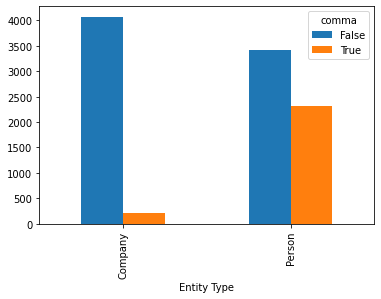

In [ ]:
CrosstabResult=pd.crosstab(index=df['Entity Type'],columns=df['comma'])
%matplotlib inline 
CrosstabResult.plot.bar()

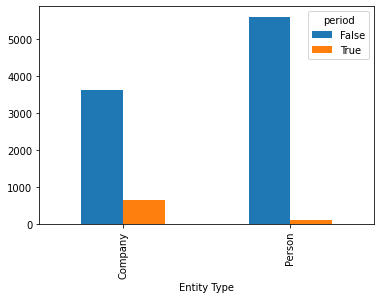

In [ ]:
CrosstabResult=pd.crosstab(index=df['Entity Type'],columns=df['period'])
%matplotlib inline 
CrosstabResult.plot.bar()

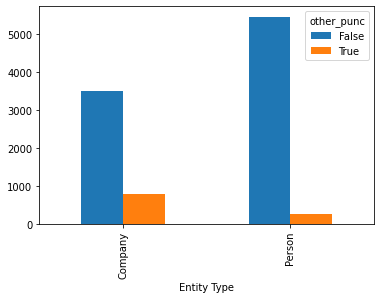

In [ ]:
CrosstabResult=pd.crosstab(index=df['Entity Type'],columns=df['other_punc'])
%matplotlib inline 
CrosstabResult.plot.bar()

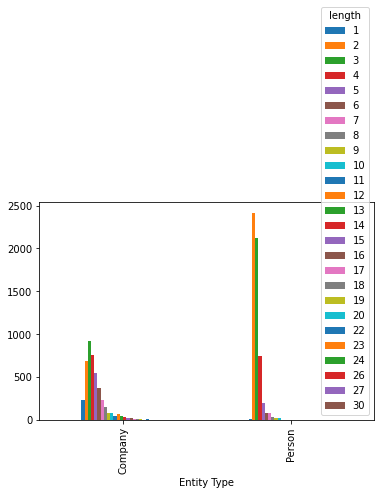

In [ ]:
CrosstabResult=pd.crosstab(index=df['Entity Type'],columns=df['length'])
%matplotlib inline 
CrosstabResult.plot.bar()

In [ ]:
import spacy
from spacy import displacy
spacy.blank('xx')
text = "Smartex International Ltd"

nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
ents = [(e.text, e.start_char, e.end_char, e.label_) for e in doc.ents]
print(ents)

[('Smartex International Ltd', 0, 25, 'ORG')]


In [ ]:
#just a thought but this may be somewhat helpful

In [ ]:
df.sample(20)

,Entity Name,Entity Type,langs_ad,length,comma,comma_num,period,other_punc
5567,Enrique Francisco Martinelli della Togna,Person,LATIN,5,False,0,False,False
1931,My Safe Market,Company,LATIN,3,False,0,False,False
1327,Bazargani Amin Banader Iranian Investment,Company,LATIN,5,False,0,False,False
3797,Handasieh - Organizzazzjoni għall- Industrji t...,Company,LATIN,8,False,0,False,True
2653,Saudi Kuwaiti Finance House S.S.C (Closed),Company,LATIN,8,False,0,True,True
2731,Innopac Holdings,Company,LATIN,2,False,0,False,False
843,Enel Green Power Ecuador S.A.,Company,LATIN,6,False,0,True,False
9410,Külli Paavel,Person,LATIN,2,False,0,False,False
2442,Intereko,Company,LATIN,1,False,0,False,False
4023,ТОВ ГАРАНТІЯ ЧЕРКАСИ,Company,CYRILLIC,3,False,0,False,False


In [ ]:
#any time there is a char not in w (so yes in w), i want to return true

In [ ]:
import sys
from unicodedata import category
 
 
punctuation_chars =  [
    chr(i) for i in range(sys.maxunicode)
    if category(chr(i)).startswith("P")
    ]

In [ ]:
len(punctuation_chars)

792

In [ ]:
new_punc_chars = ''.join(punctuation_chars).replace(',', '')
new_punc_chars

'!"#%&\'()*-./:;?@[\\]_{}¡§«¶·»¿;·՚՛՜՝՞՟։֊־׀׃׆׳״؉؊،؍؛؞؟٪٫٬٭۔܀܁܂܃܄܅܆܇܈܉܊܋܌܍߷߸߹࠰࠱࠲࠳࠴࠵࠶࠷࠸࠹࠺࠻࠼࠽࠾࡞।॥॰৽੶૰౷಄෴๏๚๛༄༅༆༇༈༉༊་༌།༎༏༐༑༒༔༺༻༼༽྅࿐࿑࿒࿓࿔࿙࿚၊။၌၍၎၏჻፠፡።፣፤፥፦፧፨᐀᙮᚛᚜᛫᛬᛭᜵᜶។៕៖៘៙៚᠀᠁᠂᠃᠄᠅᠆᠇᠈᠉᠊᥄᥅᨞᨟᪠᪡᪢᪣᪤᪥᪦᪨᪩᪪᪫᪬᪭᭚᭛᭜᭝᭞᭟᭠᯼᯽᯾᯿᰻᰼᰽᰾᰿᱾᱿᳀᳁᳂᳃᳄᳅᳆᳇᳓‐‑‒–—―‖‗‘’‚‛“”„‟†‡•‣․‥…‧‰‱′″‴‵‶‷‸‹›※‼‽‾‿⁀⁁⁂⁃⁅⁆⁇⁈⁉⁊⁋⁌⁍⁎⁏⁐⁑⁓⁔⁕⁖⁗⁘⁙⁚⁛⁜⁝⁞⁽⁾₍₎⌈⌉⌊⌋〈〉❨❩❪❫❬❭❮❯❰❱❲❳❴❵⟅⟆⟦⟧⟨⟩⟪⟫⟬⟭⟮⟯⦃⦄⦅⦆⦇⦈⦉⦊⦋⦌⦍⦎⦏⦐⦑⦒⦓⦔⦕⦖⦗⦘⧘⧙⧚⧛⧼⧽⳹⳺⳻⳼⳾⳿⵰⸀⸁⸂⸃⸄⸅⸆⸇⸈⸉⸊⸋⸌⸍⸎⸏⸐⸑⸒⸓⸔⸕⸖⸗⸘⸙⸚⸛⸜⸝⸞⸟⸠⸡⸢⸣⸤⸥⸦⸧⸨⸩⸪⸫⸬⸭⸮⸰⸱⸲⸳⸴⸵⸶⸷⸸⸹⸺⸻⸼⸽⸾⸿⹀⹁⹂⹃⹄⹅⹆⹇⹈⹉⹊⹋⹌⹍⹎⹏、。〃〈〉《》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〽゠・꓾꓿꘍꘎꘏꙳꙾꛲꛳꛴꛵꛶꛷꡴꡵꡶꡷꣎꣏꣸꣹꣺꣼꤮꤯꥟꧁꧂꧃꧄꧅꧆꧇꧈꧉꧊꧋꧌꧍꧞꧟꩜꩝꩞꩟꫞꫟꫰꫱꯫﴾﴿︐︑︒︓︔︕︖︗︘︙︰︱︲︳︴︵︶︷︸︹︺︻︼︽︾︿﹀﹁﹂﹃﹄﹅﹆﹇﹈﹉﹊﹋﹌﹍﹎﹏﹐﹑﹒﹔﹕﹖﹗﹘﹙﹚﹛﹜﹝﹞﹟﹠﹡﹣﹨﹪﹫！＂＃％＆＇（）＊，－．／：；？＠［＼］＿｛｝｟｠｡｢｣､･𐄀𐄁𐄂𐎟𐏐𐕯𐡗𐤟𐤿𐩐𐩑𐩒𐩓𐩔𐩕𐩖𐩗𐩘𐩿𐫰𐫱𐫲𐫳𐫴𐫵𐫶𐬹𐬺𐬻𐬼𐬽𐬾𐬿𐮙𐮚𐮛𐮜𐽕𐽖𐽗𐽘𐽙𑁇𑁈𑁉𑁊𑁋𑁌𑁍𑂻𑂼𑂾𑂿𑃀𑃁𑅀𑅁𑅂𑅃𑅴𑅵𑇅𑇆𑇇𑇈𑇍𑇛𑇝𑇞𑇟𑈸𑈹𑈺𑈻𑈼𑈽𑊩𑑋𑑌𑑍𑑎𑑏𑑛𑑝𑓆𑗁𑗂𑗃𑗄𑗅𑗆𑗇𑗈𑗉𑗊𑗋𑗌𑗍𑗎𑗏𑗐𑗑𑗒𑗓𑗔𑗕𑗖𑗗𑙁𑙂𑙃𑙠𑙡𑙢𑙣𑙤𑙥𑙦𑙧𑙨𑙩𑙪𑙫𑙬𑜼𑜽𑜾𑠻𑧢𑨿𑩀𑩁𑩂𑩃𑩄𑩅𑩆𑪚𑪛𑪜𑪞𑪟𑪠𑪡𑪢𑱁𑱂𑱃𑱄𑱅𑱰𑱱𑻷𑻸𑿿𒑰𒑱𒑲𒑳𒑴𖩮𖩯𖫵𖬷𖬸𖬹𖬺𖬻𖭄𖺗𖺘𖺙𖺚𖿢𛲟𝪇𝪈𝪉𝪊𝪋𞥞𞥟'

In [ ]:
def other_punc_new(Entity):
  for p in new_punc_chars:
    if p in Entity:
      return True
  return False

In [ ]:
df['other_punc'] = df['Entity Name'].apply(lambda x : other_punc_new(x))

In [ ]:
df.head()

,Entity Name,Entity Type,langs_ad,length,comma,comma_num,period,other_punc
0,Habib Afghan Road and Construction Company,Company,LATIN,6,False,0,False,False
1,Aziz Construction Company,Company,LATIN,3,False,0,False,False
2,Musawir Najib Ltd,Company,LATIN,3,False,0,False,False
3,Bamyan Central Hospital,Company,LATIN,3,False,0,False,False
4,Sadat Zohori Construction and Road Building Co...,Company,LATIN,7,False,0,False,False


In [ ]:
df['other_punc'].value_counts()

False    8087
True     1911
Name: other_punc, dtype: int64

In [ ]:
sub = df.loc[df['other_punc'] == True]
sub['langs_ad'].unique()

array(['LATIN', 'CJK', 'ARABIC', 'CYRILLIC', 'HEBREW', 'DEVANAGARI',
       'GEORGIAN', 'LAO', 'MYANMAR', 'SINHALA', 'THAI',
       'KATAKANA-HIRAGANA', 'HANGUL', 'KATAKANA'], dtype=object)

In [ ]:
df['langs_ad'].unique()

array(['LATIN', 'CJK', 'ARABIC', 'CYRILLIC', 'GREEK', 'HEBREW',
       'DEVANAGARI', 'ARMENIAN', 'HIRAGANA', 'KATAKANA-HIRAGANA',
       'KATAKANA', 'GEORGIAN', 'HANGUL', 'LAO', 'MYANMAR', 'SINHALA',
       'THAI', 'IDEOGRAPHIC'], dtype=object)

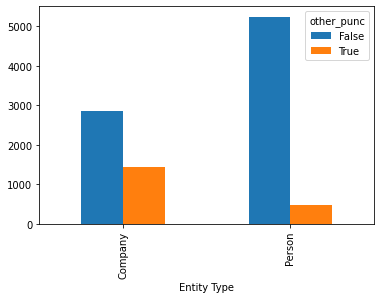

In [ ]:
CrosstabResult=pd.crosstab(index=df['Entity Type'],columns=df['other_punc'])
%matplotlib inline 
CrosstabResult.plot.bar()

# Model Training

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['df_f.csv']))

Saving df_f.csv to df_f.csv


In [ ]:
uploaded = files.upload()
dff = pd.read_csv(io.BytesIO(uploaded['dff.csv']))

Saving dff.csv to dff (3).csv


In [ ]:
df.head()

,Unnamed: 0,Entity Name,Entity Type,has_co,has_digit_num,has_common_person_name,has_city_list2,comma,other_punc,word_count,...,HIRAGANA,IDEOGRAPHIC,KATAKANA,KATAKANA-HIRAGANA,LAO,LATIN,MASCULINE,MYANMAR,SINHALA,THAI
0,0,Habib Afghan Road and Construction Company,Company,1,0,1,0,False,False,6,...,0,0,0,0,0,1,0,0,0,0
1,1,Aziz Construction Company,Company,1,0,1,0,False,False,3,...,0,0,0,0,0,1,0,0,0,0
2,2,Musawir Najib Ltd,Company,1,0,1,0,False,False,3,...,0,0,0,0,0,1,0,0,0,0
3,3,Bamyan Central Hospital,Company,1,0,0,0,False,False,3,...,0,0,0,0,0,1,0,0,0,0
4,4,Sadat Zohori Construction and Road Building Co...,Company,1,0,0,0,False,False,7,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df.drop('langs_ad', axis = 1, inplace = True)

In [ ]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
df.head()

,Entity Name,Entity Type,has_co,has_digit_num,has_common_person_name,has_city_list2,comma,other_punc,word_count,conj_pres,...,HIRAGANA,IDEOGRAPHIC,KATAKANA,KATAKANA-HIRAGANA,LAO,LATIN,MASCULINE,MYANMAR,SINHALA,THAI
0,Habib Afghan Road and Construction Company,Company,1,0,1,0,False,False,6,1,...,0,0,0,0,0,1,0,0,0,0
1,Aziz Construction Company,Company,1,0,1,0,False,False,3,0,...,0,0,0,0,0,1,0,0,0,0
2,Musawir Najib Ltd,Company,1,0,1,0,False,False,3,0,...,0,0,0,0,0,1,0,0,0,0
3,Bamyan Central Hospital,Company,1,0,0,0,False,False,3,0,...,0,0,0,0,0,1,0,0,0,0
4,Sadat Zohori Construction and Road Building Co...,Company,1,0,0,0,False,False,7,1,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
one_hot = pd.get_dummies(df['Entity Type'])
df = df.join(one_hot)

In [ ]:
one_hot = pd.get_dummies(df['langs_ad'])
df = df.join(one_hot)

In [ ]:
df.head()

,Entity Name,Entity Type,has_co,has_digit_num,has_common_person_name,has_city_list2,comma,other_punc,word_count,conj_pres,...,KATAKANA,KATAKANA-HIRAGANA,LAO,LATIN,MASCULINE,MYANMAR,SINHALA,THAI,Company,Person
0,Habib Afghan Road and Construction Company,Company,1,0,1,0,False,False,6,1,...,0,0,0,1,0,0,0,0,1,0
1,Aziz Construction Company,Company,1,0,1,0,False,False,3,0,...,0,0,0,1,0,0,0,0,1,0
2,Musawir Najib Ltd,Company,1,0,1,0,False,False,3,0,...,0,0,0,1,0,0,0,0,1,0
3,Bamyan Central Hospital,Company,1,0,0,0,False,False,3,0,...,0,0,0,1,0,0,0,0,1,0
4,Sadat Zohori Construction and Road Building Co...,Company,1,0,0,0,False,False,7,1,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
y = df['Company']
X= df.drop(['Entity Type', 'Entity Name', 'Person', 'Company'], axis = 1)

In [ ]:
X

,has_co,has_digit_num,has_common_person_name,has_city_list2,comma,other_punc,word_count,conj_pres,ARABIC,ARMENIAN,...,HIRAGANA,IDEOGRAPHIC,KATAKANA,KATAKANA-HIRAGANA,LAO,LATIN,MASCULINE,MYANMAR,SINHALA,THAI
0,1,0,1,0,False,False,6,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,1,0,False,False,3,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,1,0,False,False,3,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,False,False,3,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,False,False,7,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0,0,1,0,False,True,3,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9995,0,0,0,0,True,False,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9996,0,0,0,0,False,False,3,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9997,0,0,1,0,False,False,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = dff['encoded_langs'])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classyForest= RandomForestClassifier(n_estimators = 10000,max_depth =10)

In [ ]:
classyForest.fit(X_train,y_train)
classyForest.score(X_test,y_test)

0.8804

In [ ]:
# increasing the number of estimators from 100 to 1000, didnt imporve perforance very much at all 0.8516
# i forogot to stratify, this helped. so now, 0.8572, done with max iter = 1000, max_depth = 15

In [ ]:
# Maximum number of levels in tree
max_depth = [10,15,20,25,30,35]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [5,10,15]
# Method of selecting samples for training each tree
# Create the random grid
peram_grid = {
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
classyForest = RandomForestClassifier(random_state = 42)
roc_auc_scorer = make_scorer(roc_auc_score, greater_is_better=True,
                             needs_threshold=True)
gs = GridSearchCV(estimator=classyForest,
                  param_grid=peram_grid,
                  scoring=roc_auc_scorer,
                  cv=10,
                  n_jobs=-1)
gs.fit(X_train, y_train)
print("max roc_auc_score and hyperperam: ")
print(gs.best_score_)
print(gs.best_params_)

max roc_auc_score and hyperperam: 
0.9624091248770157
{'max_depth': 25, 'min_samples_leaf': 5, 'min_samples_split': 2}


# Pause

In [ ]:
classyForest = RandomForestClassifier(n_estimators = 10000, random_state = 42,  max_depth =  25, min_samples_leaf =  5, min_samples_split =  2)

In [ ]:
classyForest.fit(X_train,y_train)
roc_auc_score(y_test, classyForest.predict_proba(X_test)[:,1])

0.9632229110429468

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = classyForest.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1315  108]
 [ 181  896]]


In [ ]:
from sklearn.metrics import precision_score

In [ ]:
pr = precision_score(y_test, y_pred)

In [ ]:
print(pr)

0.8924302788844621


In [ ]:
from sklearn.metrics import recall_score

In [ ]:
r = recall_score(y_test, y_pred)
print(r)

0.8319405756731661


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f = f1_score(y_test,y_pred)
print(f)

0.8611244593945219


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
classyRegrassion= LogisticRegression()
classyRegrassion.fit(X_train_sc,y_train)
classyRegrassion.score(X_test_sc,y_test)

0.856

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:

roc_auc_score(y_test, classyRegrassion.predict_proba(X_test)[:,1])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.8681537425337287

In [ ]:
y_pred = classyRegrassion.predict(X_test_sc)
pr = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
f = f1_score(y_test,y_pred)
print("precition: ", pr, "recal: ", r, "f1: ", f)

precition:  0.8096885813148789 recal:  0.8698884758364313 f1:  0.8387096774193549


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
trans = PolynomialFeatures(degree=2)
X_poly = trans.fit_transform(X)
X = pd.DataFrame(X_poly)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = dff['encoded_langs'])
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
classyRegrassion= LogisticRegression()
classyRegrassion.fit(X_train_sc,y_train)
classyRegrassion.score(X_test_sc,y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8804

In [ ]:
y_pred = classyRegrassion.predict(X_test_sc)
pr = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
f = f1_score(y_test,y_pred)
print("precition: ", pr, "recal: ", r, "f1: ", f)

precition:  0.8277276456111566 recal:  0.918943533697632 f1:  0.8709538195943028


# pick up

In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
grid = {'C': [.001,.01,.1,1,10,100]}
classyRegrassion= LogisticRegression(random_state = 42)
roc_auc_scorer = make_scorer(roc_auc_score, greater_is_better=True,
                             needs_threshold=True)
gs = GridSearchCV(estimator=classyRegrassion,
                  param_grid=grid,
                  scoring=roc_auc_scorer,
                  cv=10,
                  n_jobs=-1)
gs.fit(X_train_sc, y_train)
print("max roc_auc_score and hyperperam: ")
print(gs.best_score_)
print(gs.best_params_)

max roc_auc_score and hyperperam: 
0.9575153430799336
{'C': 100}


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
classyRegrassion= LogisticRegression(C = 100, random_state = 42)
classyRegrassion.fit(X_train_sc, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100, random_state=42)

In [ ]:
y_pred = classyRegrassion.predict(X_test_sc)
pr = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
f = f1_score(y_test,y_pred)
print("precition: ", pr, "recal: ", r, "f1: ", f)

precition:  0.8278688524590164 recal:  0.9198542805100182 f1:  0.8714408973252804


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

In [ ]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.fit(X_train_sc,y_train)
print(classification_report(y_test,gradient_booster.predict(X_test_sc)))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1402
           1       0.89      0.84      0.86      1098

    accuracy                           0.88      2500
   macro avg       0.88      0.88      0.88      2500
weighted avg       0.88      0.88      0.88      2500



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
grid = {'learning_rate': [.0001,.001,.01,.1, .2,.5], 'n_estimators': [100,500,1000], 'subsample': [.001,.01,.1,1]}
classyBooster = GradientBoostingClassifier(random_state = 42)
roc_auc_scorer = make_scorer(roc_auc_score, greater_is_better=True,
                             needs_threshold=True)
gs = GridSearchCV(estimator=classyBooster,
                  param_grid=grid,
                  scoring=roc_auc_scorer,
                  cv=10,
                  n_jobs=-1)
gs.fit(X_train_sc, y_train)
print("max roc_auc_score and hyperperam: ")
print(gs.best_score_)
print(gs.best_params_)

max roc_auc_score and hyperperam: 
0.9655657868422626
{'learning_rate': 0.2, 'n_estimators': 100, 'subsample': 1}


In [ ]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.2, n_estimators = 100, subsample = 1)
gradient_booster.fit(X_train_sc,y_train)
y_pred = gradient_booster.predict(X_test_sc)
pr = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
f = f1_score(y_test,y_pred)
print("precition: ", pr, "recal: ", r, "f1: ", f)

precition:  0.8975369458128079 recal:  0.8458681522748375 f1:  0.8709369024856597


In [ ]:
from hyperopt import tpe,hp,Trials
from hyperopt.fmin import fmin
from sklearn.metrics import mean_squared_error,make_scorer

In [ ]:
seed=2
def objective(params):
    est=int(params['n_estimators'])
    md=int(params['max_depth'])
    msl=int(params['min_samples_leaf'])
    mss=int(params['min_samples_split'])
    model=RandomForestClassifier(n_estimators=est,max_depth=md,min_samples_leaf=msl,min_samples_split=mss)
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    score=mean_squared_error(y_test,pred)
    return score

def optimize(trial):
    params={'n_estimators':hp.uniform('n_estimators',100,500),
           'max_depth':hp.uniform('max_depth',10,50),
           'min_samples_leaf':hp.uniform('min_samples_leaf',10,50),
           'min_samples_split':hp.uniform('min_samples_split', 10,20)}
    best=fmin(fn=objective,space=params,algo=tpe.suggest,trials=trial,max_evals=500,rstate=np.random.RandomState(seed))
    return best


In [ ]:
trial=Trials()
best=optimize(trial)

100%|██████████| 500/500 [05:53<00:00,  1.42it/s, best loss: 0.1216]


In [ ]:
print(best)

{'max_depth': 30.14109956191131, 'min_samples_leaf': 10.0554907451007, 'min_samples_split': 19.65315583958348, 'n_estimators': 145.15106079890967}


In [ ]:
classyForest = RandomForestClassifier(max_depth =  30, min_samples_leaf =  10, min_samples_split =  20, n_estimators = 10000)

In [ ]:
classyForest.fit(X_train,y_train)
roc_auc_score(y_test, classyForest.predict_proba(X_test)[:,1])

ValueError: ignored

In [ ]:
y_pred = classyForest.predict(X_test)
pr = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
f = f1_score(y_test,y_pred)
print("precition: ", pr, "recal: ", r, "f1: ", f)

precition:  0.8824120603015075 recal:  0.8152274837511606 f1:  0.8474903474903475


In [ ]:
seed=2
def objective(params):
    est=int(params['n_estimators'])
    md=int(params['max_depth'])
    msl=int(params['min_samples_leaf'])
    mss=int(params['min_samples_split'])
    model=RandomForestClassifier(n_estimators=est,max_depth=md,min_samples_leaf=msl,min_samples_split=mss)
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    score=mean_squared_error(y_test,pred)
    return score

def optimize(trial):
    params={'n_estimators':hp.uniform('n_estimators',500,5000),
           'max_depth':hp.uniform('max_depth',20,150),
           'min_samples_leaf':hp.uniform('min_samples_leaf',10,30),
           'min_samples_split':hp.uniform('min_samples_split',5,20)}
    best=fmin(fn=objective,space=params,algo=tpe.suggest,trials=trial,max_evals=500,rstate=np.random.RandomState(seed))
    return best

trial=Trials()
best=optimize(trial)

print(best)


100%|██████████| 500/500 [17:12<00:00,  2.06s/it, best loss: 0.1132]
{'max_depth': 15.921245005420678, 'min_samples_leaf': 1.5619890432490267, 'min_samples_split': 9.046865010756232, 'n_estimators': 962.0914903505787}


In [ ]:
def objective(params):
    lr = (params['learning_rate'])
    md=int(params['max_depth'])
    ss=(params['subsample'])
    model=GradientBoostingClassifier(learning_rate = lr, subsample=ss,max_depth=md)
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    score=mean_squared_error(y_test,pred)
    return score

def optimize(trial):
    params={'learning_rate':hp.choice('learning_rate',np.arange(0.05, 0.31, 0.05)),'subsample':hp.uniform('subsample', 0.8, 1),'max_depth': hp.choice('max_depth', np.arange(5, 16, 1))}
    best=fmin(fn=objective,space=params,algo=tpe.suggest,trials=trial,max_evals=500,rstate=np.random.RandomState(seed))
    return best


In [ ]:
np.arange(0.05, 0.31, 0.05)

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 ])

In [ ]:
trial=Trials()
best=optimize(trial)

  0%|          | 1/500 [00:02<22:50,  2.75s/it, best loss: 0.1088]


KeyboardInterrupt: ignored

In [ ]:
print(best)

{'learning_rate': 5, 'max_depth': 10, 'subsample': 0.9974161292788366}


In [ ]:
gradient_booster = GradientBoostingClassifier(learning_rate=.15, max_depth = 10, subsample = .98)
gradient_booster.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.15, max_depth=10, subsample=0.98)

In [ ]:
y_pred = gradient_booster.predict(X_test)
pr = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
f = f1_score(y_test,y_pred)
print("precition: ", pr, "recal: ", r, "f1: ", f)

precition:  0.8952569169960475 recal:  0.841225626740947 f1:  0.8674006701771182


In [ ]:
roc_auc_score(y_test, gradient_booster.predict_proba(X_test)[:,1])

0.964179473577407

In [ ]:
X_train.sample()

,langs_ad,has_co,has_digit_num,has_common_person_name,has_city_list2,comma,other_punc,word_count,conj_pres
2125,LATIN,0,0,NaN,NaN,False,False,5,1


In [ ]:
classyForest = RandomForestClassifier(n_estimators = 10000, random_state = 42,  max_depth =  25, min_samples_leaf =  5, min_samples_split =  2)
classyForest.fit(X_train,y_train)
y_pred = classyForest.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
imps = classyForest.feature_importances_
forest_importances = pd.Series(imps, X.columns)

forest_imps = {}
for c, i in zip(X_train.columns,imps):
  forest_imps[c] = i
sorted_imps = dict(reversed(sorted(forest_imps.items(), key=lambda item: item[1])))
print(sorted_imps)
j = 1
for k in sorted_imps:
  print(j, ": ", k, ": ", sorted_imps[k])
  j= j+1


{'has_co': 0.2804136353974996, 'comma': 0.1848945800923264, 'word_count': 0.1802361832772355, 'has_common_person_name': 0.14484488080740693, 'other_punc': 0.04171280646882276, 'CJK': 0.03498327178866768, 'conj_pres': 0.034023449345622146, 'LATIN': 0.023757466586668708, 'HANGUL': 0.020493157686498134, 'has_city_list2': 0.017873764344333073, 'CYRILLIC': 0.011554533771114183, 'ARABIC': 0.00455218680357851, 'has_digit_num': 0.004398011487520961, 'KATAKANA': 0.0038325961331820333, 'DEVANAGARI': 0.003103892972904334, 'GEORGIAN': 0.0018592493590370595, 'GREEK': 0.0016871448888725986, 'ARMENIAN': 0.0016023895693279035, 'SINHALA': 0.0009784497831248013, 'HEBREW': 0.0009315323696047536, 'MYANMAR': 0.0007158639955576728, 'THAI': 0.000568366471036491, 'HIRAGANA': 0.000534031662373374, 'LAO': 0.0004485549376843315, 'MASCULINE': 0.0, 'KATAKANA-HIRAGANA': 0.0, 'IDEOGRAPHIC': 0.0}
1 :  has_co :  0.2804136353974996
2 :  comma :  0.1848945800923264
3 :  word_count :  0.1802361832772355
4 :  has_common_p

true-negitive: 1322 
false-positive: 103 
false-negative: 161 
true-positive: 914


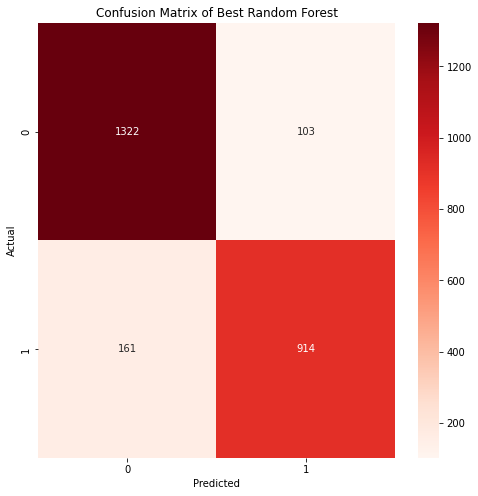

In [ ]:
cm = cm.round(2)


tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, cmap='Reds', fmt='g')
plt.title("Confusion Matrix of Best Random Forest")
plt.xlabel('Predicted')
plt.ylabel('Actual')

print('true-negitive:', tn, 
      '\nfalse-positive:', fp, 
      '\nfalse-negative:', fn, 
      '\ntrue-positive:', tp )

In [ ]:
y_pred = classyForest.predict(X_test)
pr = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
f = f1_score(y_test,y_pred)
print("precition: ", pr, "recal: ", r, "f1: ", f)

precition:  0.8987217305801377 recal:  0.8502325581395349 f1:  0.8738049713193117


In [ ]:
gradient_booster = GradientBoostingClassifier(learning_rate=.2)
gradient_booster.fit(X_train,y_train)
y_pred = gradient_booster.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

true-negitive: 1336 
false-positive: 89 
false-negative: 162 
true-positive: 913


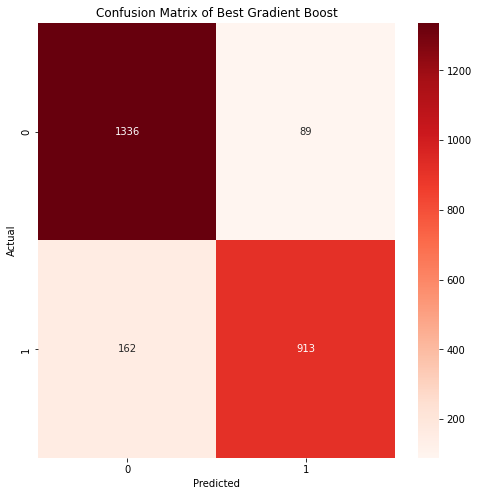

In [ ]:
cm = cm.round(2)


tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, cmap='Reds', fmt='g')
plt.title("Confusion Matrix of Best Gradient Boost")
plt.xlabel('Predicted')
plt.ylabel('Actual')

print('true-negitive:', tn, 
      '\nfalse-positive:', fp, 
      '\nfalse-negative:', fn, 
      '\ntrue-positive:', tp )

In [ ]:
y_pred = gradient_booster.predict(X_test)
pr = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
f = f1_score(y_test,y_pred)
print("precition: ", pr, "recal: ", r, "f1: ", f)

precition:  0.9111776447105788 recal:  0.8493023255813954 f1:  0.8791526239768898
